In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load the data
data = pd.read_csv('Molecular-data.csv')
data

,Molar volume,Density
0,26.379294,5.254
1,25.847969,5.362
2,26.510484,5.228
3,25.737570,5.385
4,25.402642,5.456
5,24.931968,5.559
6,26.612291,5.208
7,26.694301,5.192
8,26.434639,5.243
9,26.495280,5.231


In [3]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

# Collect input feature for training, molar volume value in this case
train_features = train_dataset.copy() #dataframe type
test_features = test_dataset.copy()

# Collect respective label, density value in this case
train_labels = train_features.pop('Density') # series type
test_labels = test_features.pop('Density')

In [4]:
# Select a linear model
model = DecisionTreeRegressor(random_state=1)

# Train the model
model.fit(train_features, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [5]:
def plot_density(x, y):
  plt.scatter(train_features['Molar volume'], train_labels, label='Data')
  plt.plot(x, y, color='r', label='Predictions')
  plt.xlabel('Molar volume')
  plt.ylabel('Density')
  plt.legend()

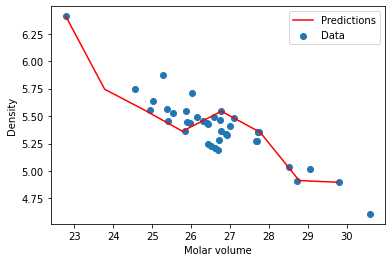

In [6]:
x = np.arange(train_features['Molar volume'].min(), train_features['Molar volume'].max()).reshape(-1, 1)
pred = model.predict(x)
plot_density(x,pred)

In [7]:
pred

array([6.409, 5.744, 5.559, 5.362, 5.544, 5.352, 4.913, 4.897])

In [8]:
pred_y = model.predict(train_features)
pred_y

array([5.435, 5.638, 5.56 , 5.357, 5.228, 5.337, 4.897, 5.022, 5.456,
       5.456, 5.27 , 5.276, 5.361, 6.409, 5.433, 5.192, 5.524, 5.354,
       5.352, 5.032, 5.744, 5.46 , 5.489, 4.913, 5.479, 5.431, 5.871,
       5.243, 4.609, 5.546, 5.559, 5.278, 5.707, 5.544, 5.362, 5.445,
       5.406, 5.33 , 5.208, 5.488])

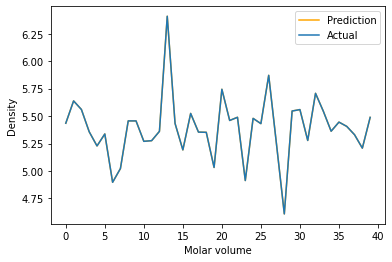

In [15]:
actual_trend=train_labels.values
plt.plot(pred_y, color='orange', label='Prediction')
plt.plot(actual_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

The prediction line is not disappear or missing, it actually is there! The training accuracy is 100% which is consider as overfitting since the prediction is totally matched to actual training data.

In [12]:
actual_trend

array([5.435, 5.638, 5.56 , 5.357, 5.228, 5.337, 4.897, 5.022, 5.456,
       5.456, 5.27 , 5.276, 5.361, 6.409, 5.433, 5.192, 5.524, 5.354,
       5.352, 5.032, 5.744, 5.46 , 5.489, 4.913, 5.479, 5.431, 5.871,
       5.243, 4.609, 5.546, 5.559, 5.278, 5.707, 5.544, 5.362, 5.445,
       5.406, 5.33 , 5.208, 5.488])

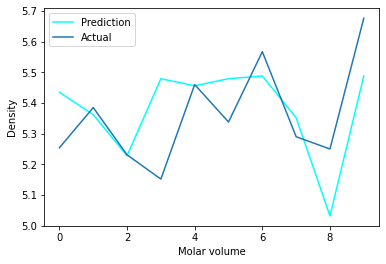

In [10]:
pred_test = model.predict(test_features)
actual_test_trend=test_labels.values
plt.plot(pred_test, color='cyan', label='Prediction')
plt.plot(actual_test_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

In [13]:
differences = (1 - sum(abs(pred_test - actual_test_trend))/len(actual_test_trend)) * 100
pred_accuracy = differences.item()
pred_accuracy

87.73999999999998